In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import math
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
import random




In [87]:
label_col = 'HasDetections'

In [88]:
columns_to_ignore = ('DefaultBrowsersIdentifier',  # 95.14% NA values
                     'PuaMode', # 99.97% NA values
                     'Census_ProcessorClass', # 99.59% NA values.
                     'Census_InternalBatteryType', # 71.05% NA values
                     'Census_IsFlightingInternal', #83.04% NA values
                     'Census_ThresholdOptIn', # 63.52% NA values
                     
                     # numerical features
                     'Census_PrimaryDiskTotalCapacity', 
                     'Census_SystemVolumeTotalCapacity', 
                     'Census_TotalPhysicalRAM',        
                     'Census_InternalPrimaryDisplayResolutionHorizontal',
                     'Census_InternalPrimaryDisplayResolutionVertical',
                     'Census_InternalPrimaryDiagonalDisplaySizeInInches',
                     'Census_InternalBatteryNumberOfCharges',
                     
                     'IsBeta', 
                     'AutoSampleOptIn', 
                     'UacLuaenable', 
                     'Census_IsWIMBootEnabled',
                     
                     'Census_FlightRing_not',
                     'Census_IsAlwaysOnAlwaysConnectedCapable',
                     'Census_IsSecureBootEnabled',
                     'Census_IsTouchEnabled',
                     'Census_IsVirtualDevice',
                     'SMode'
                    )

In [89]:
# Dataset
df = pd.read_csv('train.csv',
                 usecols = lambda x: x not in columns_to_ignore)
df.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,IeVerIdentifier,SmartScreen,Firewall,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTypeName,Census_HasOpticalDiskDrive,Census_ChassisTypeName,Census_PowerPlatformRoleName,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightsDisabled,Census_FlightRing,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsPenCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,7.0,0.0,53447.0,1.0,1.0,1.0,29.0,128035.0,18.0,35.0,171.0,windows10,x64,10.0.0.0,17134.0,256.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,137.0,NaN,1.0,Desktop,Windows.Desktop,2668.0,9124.0,4.0,5.0,2341.0,HDD,0.0,Desktop,Desktop,10.0.17134.165,amd64,rs4_release,17134.0,165.0,Professional,PROFESSIONAL,UUPUpgrade,26.0,119.0,UNKNOWN,0.0,IS_GENUINE,Retail,0.0,Retail,628.0,36144.0,0.0,0.0,10.0,0.0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,7.0,0.0,53447.0,1.0,1.0,1.0,93.0,1482.0,18.0,119.0,64.0,windows10,x64,10.0.0.0,17134.0,256.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,137.0,NaN,1.0,Notebook,Windows.Desktop,2668.0,91656.0,4.0,5.0,2405.0,HDD,0.0,Notebook,Mobile,10.0.17134.1,amd64,rs4_release,17134.0,1.0,Professional,PROFESSIONAL,IBSClean,8.0,31.0,UNKNOWN,0.0,OFFLINE,Retail,0.0,NOT_SET,628.0,57858.0,0.0,0.0,8.0,0.0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,7.0,0.0,53447.0,1.0,1.0,1.0,86.0,153579.0,18.0,64.0,49.0,windows10,x64,10.0.0.0,17134.0,768.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,137.0,RequireAdmin,1.0,Desktop,Windows.Desktop,4909.0,317701.0,4.0,5.0,1972.0,SSD,0.0,Desktop,Desktop,10.0.17134.165,amd64,rs4_release,17134.0,165.0,Core,CORE,UUPUpgrade,7.0,30.0,FullAuto,0.0,IS_GENUINE,OEM:NONSLP,0.0,Retail,142.0,52682.0,0.0,0.0,3.0,0.0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,7.0,0.0,53447.0,1.0,1.0,1.0,88.0,20710.0,NaN,117.0,115.0,windows10,x64,10.0.0.0,17134.0,256.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,137.0,ExistsNotSet,1.0,Desktop,Windows.Desktop,1443.0,275890.0,4.0,5.0,2273.0,UNKNOWN,0.0,MiniTower,Desktop,10.0.17134.228,amd64,rs4_release,17134.0,228.0,Professional,PROFESSIONAL,UUPUpgrade,17.0,64.0,FullAuto,0.0,IS_GENUINE,OEM:NONSLP,0.0,Retail,355.0,20050.0,0.0,0.0,3.0,1.0
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,7.0,0.0,53447.0,1.0,1.0,1.0,18.0,37376.0,NaN,277.0,75.0,windows10,x64,10.0.0.0,17134.0,768.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,137.0,RequireAdmin,1.0,Notebook,Windows.Desktop,1443.0,331929.0,4.0,5.0,2500.0,HDD,0.0,Portable,Mobile,10.0.17134.191,amd64,rs4_release,17134.0,191.0,Core,CORE,Update,8.0,31.0,FullAuto,0.0,IS_GENUINE,Retail,0.0,Retail,355.0,19844.0,0.0,0.0,1.0,1.0


In [90]:
df.shape # Shape

(726243, 61)

In [91]:
df.info()# Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726243 entries, 0 to 726242
Data columns (total 61 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   MachineIdentifier                       399999 non-null  object 
 1   ProductName                             399999 non-null  object 
 2   EngineVersion                           399999 non-null  object 
 3   AppVersion                              399999 non-null  object 
 4   AvSigVersion                            399999 non-null  object 
 5   RtpStateBitfield                        398509 non-null  float64
 6   IsSxsPassiveMode                        399999 non-null  float64
 7   AVProductStatesIdentifier               398375 non-null  float64
 8   AVProductsInstalled                     398375 non-null  float64
 9   AVProductsEnabled                       398375 non-null  float64
 10  HasTpm                                  3999

In [92]:
# NULL values
df.isna().sum()

MachineIdentifier                   326244
ProductName                         326244
EngineVersion                       326244
AppVersion                          326244
AvSigVersion                        326244
                                     ...  
Census_FirmwareVersionIdentifier    333417
Census_IsPenCapable                 326244
Wdft_IsGamer                        339921
Wdft_RegionIdentifier               339921
HasDetections                       326244
Length: 61, dtype: int64

In [93]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 34 numerical features : ['RtpStateBitfield', 'IsSxsPassiveMode', 'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm', 'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier', 'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'OsBuild', 'OsSuite', 'IsProtected', 'IeVerIdentifier', 'Firewall', 'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier', 'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier', 'Census_ProcessorModelIdentifier', 'Census_HasOpticalDiskDrive', 'Census_OSBuildNumber', 'Census_OSBuildRevision', 'Census_OSInstallLanguageIdentifier', 'Census_OSUILocaleIdentifier', 'Census_IsPortableOperatingSystem', 'Census_IsFlightsDisabled', 'Census_FirmwareManufacturerIdentifier', 'Census_FirmwareVersionIdentifier', 'Census_IsPenCapable', 'Wdft_IsGamer', 'Wdft_RegionIdentifier', 'HasDetections']

We have 27 categorical features : ['MachineIdentifier', 'ProductName', 'EngineVersion', 'AppVersion', 'AvSigVersion', 'Platf

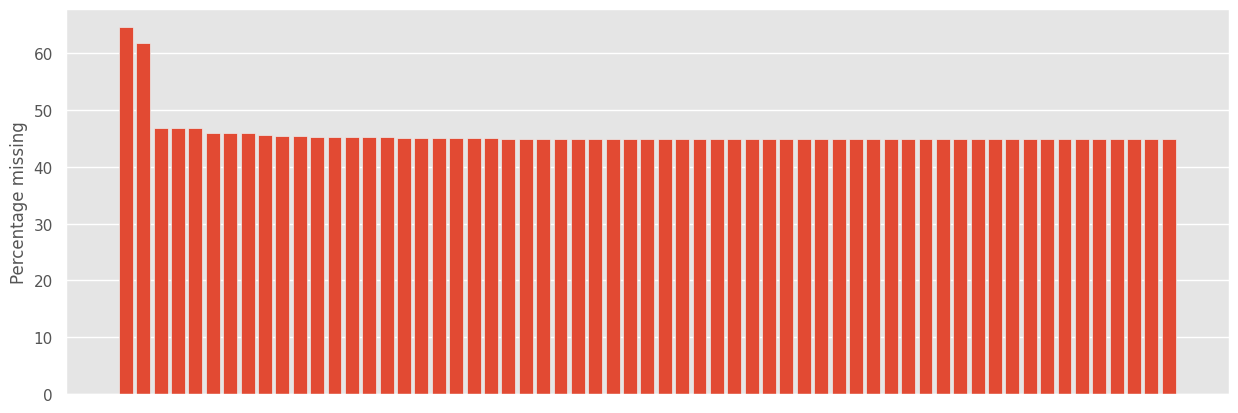

In [94]:
# Plotting Missing values count for each column
fig, ax = plt.subplots(figsize=(15,5))

missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)

ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel("Percentage missing")
plt.show()

In [102]:
## Dropping columns which has more than 70% of missing values
dropcols = missing[missing[0]>70]
dropcols

,0


In [96]:
df.drop(list(dropcols.index), axis=1, inplace=True)

In [103]:
missing_values_count= df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
print(f"Percentage of total missing cells in the data {(total_missing/total_cells) * 100}%")

Percentage of total missing cells in the data 45.147896871703566%


In [105]:
df.dropna()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,IeVerIdentifier,Firewall,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTypeName,Census_HasOpticalDiskDrive,Census_ChassisTypeName,Census_PowerPlatformRoleName,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightsDisabled,Census_FlightRing,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsPenCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,7.0,0.0,53447.0,1.0,1.0,1.0,29.0,128035.0,35.0,171.0,windows10,x64,10.0.0.0,17134.0,256.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,137.0,1.0,Desktop,Windows.Desktop,2668.0,9124.0,4.0,5.0,2341.0,HDD,0.0,Desktop,Desktop,10.0.17134.165,amd64,rs4_release,17134.0,165.0,Professional,PROFESSIONAL,UUPUpgrade,26.0,119.0,UNKNOWN,0.0,IS_GENUINE,Retail,0.0,Retail,628.0,36144.0,0.0,0.0,10.0,0.0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,7.0,0.0,53447.0,1.0,1.0,1.0,93.0,1482.0,119.0,64.0,windows10,x64,10.0.0.0,17134.0,256.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,137.0,1.0,Notebook,Windows.Desktop,2668.0,91656.0,4.0,5.0,2405.0,HDD,0.0,Notebook,Mobile,10.0.17134.1,amd64,rs4_release,17134.0,1.0,Professional,PROFESSIONAL,IBSClean,8.0,31.0,UNKNOWN,0.0,OFFLINE,Retail,0.0,NOT_SET,628.0,57858.0,0.0,0.0,8.0,0.0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,7.0,0.0,53447.0,1.0,1.0,1.0,86.0,153579.0,64.0,49.0,windows10,x64,10.0.0.0,17134.0,768.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,137.0,1.0,Desktop,Windows.Desktop,4909.0,317701.0,4.0,5.0,1972.0,SSD,0.0,Desktop,Desktop,10.0.17134.165,amd64,rs4_release,17134.0,165.0,Core,CORE,UUPUpgrade,7.0,30.0,FullAuto,0.0,IS_GENUINE,OEM:NONSLP,0.0,Retail,142.0,52682.0,0.0,0.0,3.0,0.0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,7.0,0.0,53447.0,1.0,1.0,1.0,88.0,20710.0,117.0,115.0,windows10,x64,10.0.0.0,17134.0,256.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,137.0,1.0,Desktop,Windows.Desktop,1443.0,275890.0,4.0,5.0,2273.0,UNKNOWN,0.0,MiniTower,Desktop,10.0.17134.228,amd64,rs4_release,17134.0,228.0,Professional,PROFESSIONAL,UUPUpgrade,17.0,64.0,FullAuto,0.0,IS_GENUINE,OEM:NONSLP,0.0,Retail,355.0,20050.0,0.0,0.0,3.0,1.0
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,7.0,0.0,53447.0,1.0,1.0,1.0,18.0,37376.0,277.0,75.0,windows10,x64,10.0.0.0,17134.0,768.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,137.0,1.0,Notebook,Windows.Desktop,1443.0,331929.0,4.0,5.0,2500.0,HDD,0.0,Portable,Mobile,10.0.17134.191,amd64,rs4_release,17134.0,191.0,Core,CORE,Update,8.0,31.0,FullAuto,0.0,IS_GENUINE,Retail,0.0,Retail,355.0,19844.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399993,0b8116688558a6b1e8129df8ef8ca8b7,win8defender,1.1.14901.4,4.8.10240.17443,1.269.17.0,7.0,0.0,62773.0,1.0,1.0,1.0,211.0,24475.0,240.0,233.0,windows10,x86,10.0.0.0,10240.0,

In [106]:
# Target value counts
df[label_col].value_counts()

1.0    200443
0.0    199556
Name: HasDetections, dtype: int64

In [107]:
df.duplicated().sum()# Duplicates

326243

In [108]:
df.drop_duplicates()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,IeVerIdentifier,Firewall,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTypeName,Census_HasOpticalDiskDrive,Census_ChassisTypeName,Census_PowerPlatformRoleName,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightsDisabled,Census_FlightRing,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsPenCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,7.0,0.0,53447.0,1.0,1.0,1.0,29.0,128035.0,35.0,171.0,windows10,x64,10.0.0.0,17134.0,256.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,137.0,1.0,Desktop,Windows.Desktop,2668.0,9124.0,4.0,5.0,2341.0,HDD,0.0,Desktop,Desktop,10.0.17134.165,amd64,rs4_release,17134.0,165.0,Professional,PROFESSIONAL,UUPUpgrade,26.0,119.0,UNKNOWN,0.0,IS_GENUINE,Retail,0.0,Retail,628.0,36144.0,0.0,0.0,10.0,0.0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,7.0,0.0,53447.0,1.0,1.0,1.0,93.0,1482.0,119.0,64.0,windows10,x64,10.0.0.0,17134.0,256.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,137.0,1.0,Notebook,Windows.Desktop,2668.0,91656.0,4.0,5.0,2405.0,HDD,0.0,Notebook,Mobile,10.0.17134.1,amd64,rs4_release,17134.0,1.0,Professional,PROFESSIONAL,IBSClean,8.0,31.0,UNKNOWN,0.0,OFFLINE,Retail,0.0,NOT_SET,628.0,57858.0,0.0,0.0,8.0,0.0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,7.0,0.0,53447.0,1.0,1.0,1.0,86.0,153579.0,64.0,49.0,windows10,x64,10.0.0.0,17134.0,768.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,137.0,1.0,Desktop,Windows.Desktop,4909.0,317701.0,4.0,5.0,1972.0,SSD,0.0,Desktop,Desktop,10.0.17134.165,amd64,rs4_release,17134.0,165.0,Core,CORE,UUPUpgrade,7.0,30.0,FullAuto,0.0,IS_GENUINE,OEM:NONSLP,0.0,Retail,142.0,52682.0,0.0,0.0,3.0,0.0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,7.0,0.0,53447.0,1.0,1.0,1.0,88.0,20710.0,117.0,115.0,windows10,x64,10.0.0.0,17134.0,256.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,137.0,1.0,Desktop,Windows.Desktop,1443.0,275890.0,4.0,5.0,2273.0,UNKNOWN,0.0,MiniTower,Desktop,10.0.17134.228,amd64,rs4_release,17134.0,228.0,Professional,PROFESSIONAL,UUPUpgrade,17.0,64.0,FullAuto,0.0,IS_GENUINE,OEM:NONSLP,0.0,Retail,355.0,20050.0,0.0,0.0,3.0,1.0
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,7.0,0.0,53447.0,1.0,1.0,1.0,18.0,37376.0,277.0,75.0,windows10,x64,10.0.0.0,17134.0,768.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,137.0,1.0,Notebook,Windows.Desktop,1443.0,331929.0,4.0,5.0,2500.0,HDD,0.0,Portable,Mobile,10.0.17134.191,amd64,rs4_release,17134.0,191.0,Core,CORE,Update,8.0,31.0,FullAuto,0.0,IS_GENUINE,Retail,0.0,Retail,355.0,19844.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,0b811c2969b76a1cc48d93c7cd8c1bc6,win8defender,1.1.15100.1,4.18.1807.18075,1.273.703.0,7.0,0.0,53447.0,1.0,1.0,1.0,169.0,53686.0,209.0,179.0,windows10,x64,10.0.0.0,17134.0

In [110]:
df = df.dropna()

In [111]:
df.describe()

,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,IsProtected,IeVerIdentifier,Firewall,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_HasOpticalDiskDrive,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_IsPortableOperatingSystem,Census_IsFlightsDisabled,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsPenCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
count,349245.000000,349245.000000,349245.000000,349245.000000,349245.000000,349245.000000,349245.000000,349245.000000,349245.000000,349245.000000,349245.000000,349245.000000,349245.000000,349245.000000,349245.000000,349245.000000,349245.000000,349245.000000,349245.000000,349245.000000,349245.000000,349245.000000,349245.000000,349245.000000,349245.00000,349245.000000,349245.000000,349245.000000,349245.000000,349245.000000,349245.000000,349245.000000,349245.000000
mean,6.842681,0.018153,47818.817257,1.340437,1.020318,0.998053,108.143893,81257.528849,170.008095,122.908339,15855.885373,582.009306,0.945746,123.512314,0.979189,2200.782233,238121.637329,3.974923,4.525273,2360.749611,0.079812,15927.918289,993.694816,14.553631,60.21870,0.000633,0.000011,403.221137,32980.605844,0.039419,0.289711,7.864078,0.503180
std,1.032100,0.133506,14121.303481,0.529943,0.162796,0.044083,62.981453,48910.768845,89.142875,69.547826,1966.613880,246.241783,0.226519,34.214247,0.142750,1297.888826,71753.038565,1.993661,1.294418,841.764734,0.271003,1843.228273,2957.625025,10.176020,44.89644,0.025147,0.003384,221.190450,21180.499038,0.194591,0.453629,4.548995,0.499991
min,0.000000,0.000000,39.000000,1.000000,0.000000,0.000000,1.000000,5.000000,1.000000,1.000000,7600.000000,256.000000,0.000000,1.000000,0.000000,47.000000,22.000000,1.000000,1.000000,19.000000,0.000000,7601.000000,0.000000,1.000000,5.00000,0.000000,0.000000,17.000000,18.000000,0.000000,0.000000,1.000000,0.000000
25%,7.000000,0.000000,49480.000000,1.000000,1.000000,1.000000,51.000000,36825.000000,89.000000,74.000000,15063.000000,256.000000,1.000000,111.000000,1.000000,1443.000000,189557.000000,2.000000,5.000000,1998.000000,0.000000,15063.000000,187.000000,8.000000,31.00000,0.000000,0.000000,142.000000,13154.000000,0.000000,0.000000,3.000000,0.000000
50%,7.000000,0.000000,53447.000000,1.000000,1.000000,1.000000,97.000000,82373.000000,181.000000,88.000000,16299.000000,768.000000,1.000000,117.000000,1.000000,2102.000000,245824.000000,4.000000,5.000000,2498.000000,0.000000,16299.000000,285.000000,9.000000,34.00000,0.000000,0.000000,500.000000,33066.000000,0.000000,0.000000,10.000000,1.000000
75%,7.000000,0.000000,53447.000000,2.000000,1.000000,1.000000,162.000000,123729.000000,267.000000,182.000000,17134.000000,768.000000,1.000000,137.000000,1.000000,2668.000000,300972.000000,4.000000,5.000000,2853.000000,0.000000,17134.000000,547.000000,20.000000,83.00000,0.000000,0.000000,556.000000,52380.000000,0.000000,1.000000,11.000000,1.000000
max,8.000000,1.000000,70486.000000,5.000000,4.000000,1.000000,222.000000,167962.000000,296.000000,283.000000,18242.000000,784.000000,1.000000,398.000000,1.000000,6144.000000,345494.000000,80.000000,10.000000,4472.000000,1.000000,18242.000000,17976.000000,39.000000,162.00000,1.000000,1.000000,1087.000000,72091.000000,1.000000,1.000000,15.000000,1.000000


Text(0.5, 1.05, 'Pearson correlation of Features')

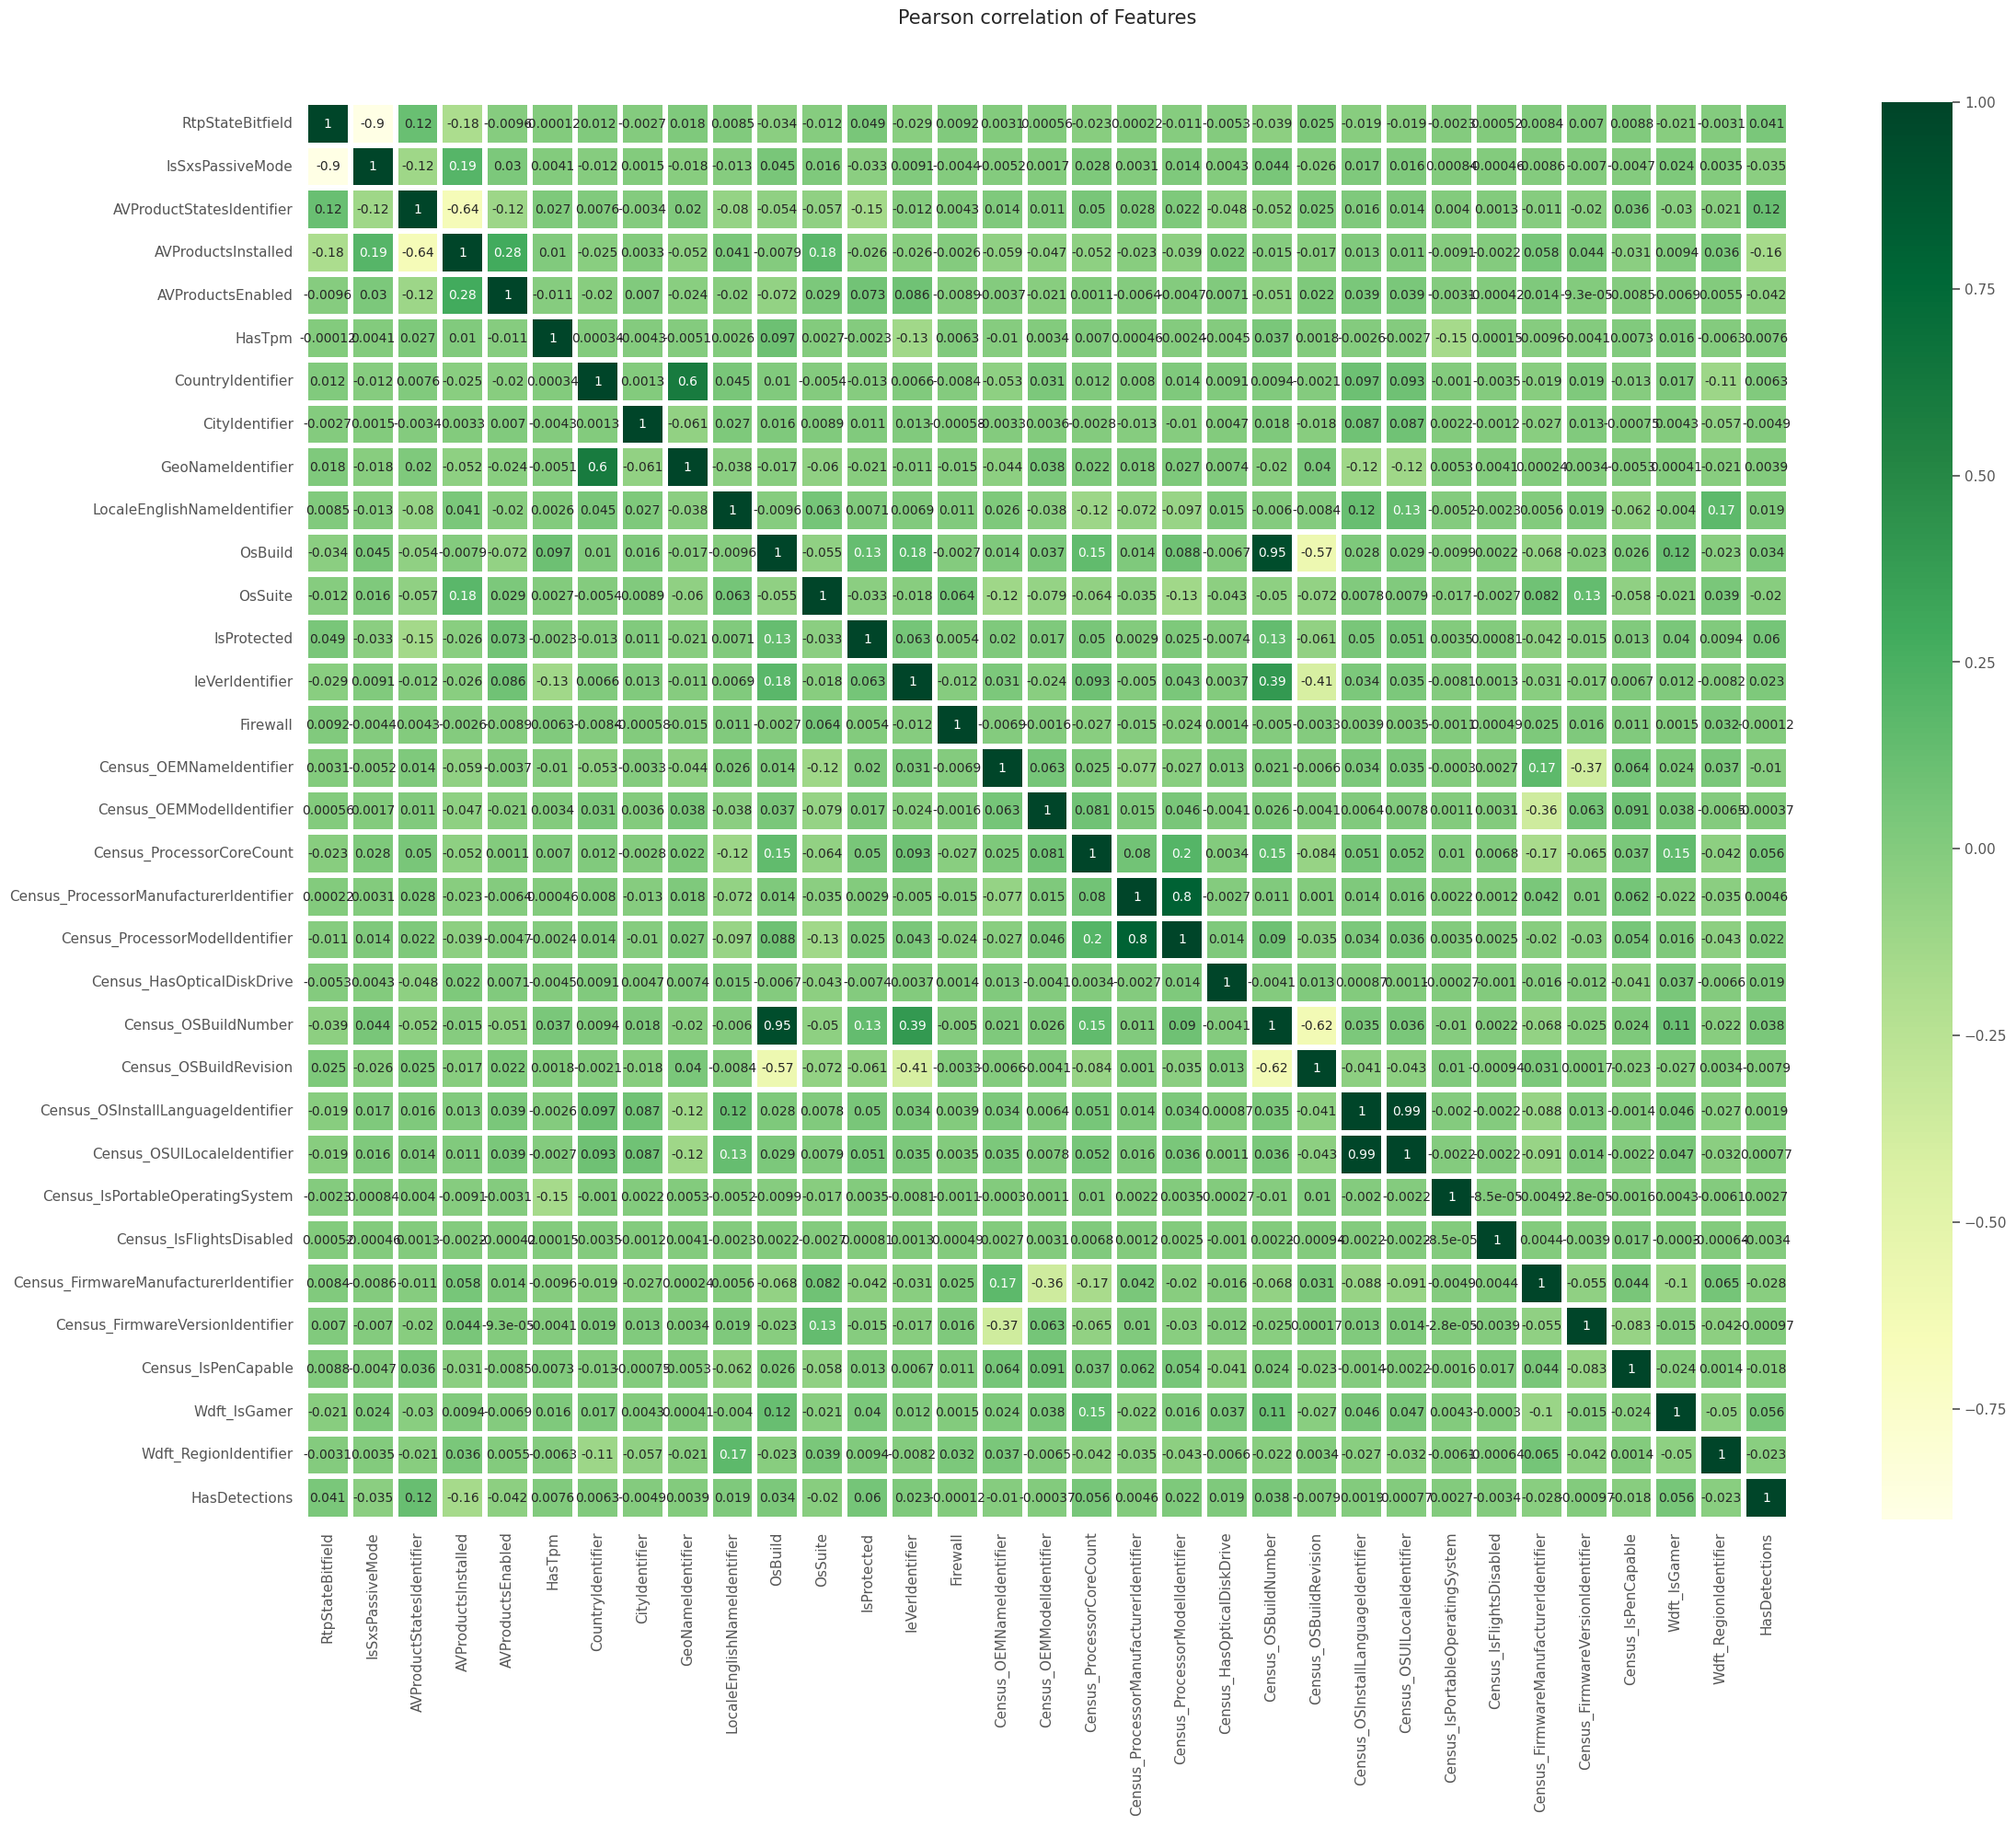

In [113]:
# Pearson correlation table to find the relationship with output with all input features. 
corr =df.corr()
f, ax = plt.subplots(figsize=(26,20))
sns.heatmap(corr, ax=ax, annot=True,linewidths=3,cmap='YlGn')
plt.title("Pearson correlation of Features", y=1.05, size=15)

* 'Census_BuildOSNumber' and 'OSBuild' are highly correlated
* 'Census_OSUILocalIdentifier' and 'Census_OSInstallLanguageIdentifier are highly correlated,
* 'Census_OSBuildNumber' and 'LocalEnglishNameidentifier' are highly correlatd'

In [114]:
# Drop highly coorelated columns
df.drop(['Census_OSBuildNumber','OsBuild','Census_OSUILocaleIdentifier','Census_OSInstallLanguageIdentifier','Census_OSBuildNumber','LocaleEnglishNameIdentifier'],axis=1,inplace=True)

In [116]:
# Drop unnecessary column
df.drop('MachineIdentifier',axis=1,inplace=True)

In [117]:
X = df.drop('HasDetections',axis=1) # Independent features
y = df['HasDetections'] # Dependent features

In [118]:
categorical_features = categorical_features.remove('MachineIdentifier')

In [76]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.5 MB/s eta 0:00:00


In [119]:

# Target encoding
import category_encoders as ce
target_encoder = ce.TargetEncoder()
X = target_encoder.fit_transform(X,y)
X.head(2)

,ProductName,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,GeoNameIdentifier,Platform,Processor,OsVer,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,IeVerIdentifier,Firewall,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTypeName,Census_HasOpticalDiskDrive,Census_ChassisTypeName,Census_PowerPlatformRoleName,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightsDisabled,Census_FlightRing,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsPenCapable,Wdft_IsGamer,Wdft_RegionIdentifier
0,0.503302,0.557169,0.537930,0.603675,7.0,0.0,53447.0,1.0,1.0,1.0,29.0,128035.0,35.0,0.503195,0.514744,0.503192,256.0,0.527405,0.536199,0.516214,1.0,137.0,1.0,0.529102,0.50318,2668.0,9124.0,4.0,5.0,2341.0,0.508929,0.0,0.527946,0.531038,0.567251,0.51469,0.528895,165.0,0.514108,0.514814,0.528792,0.496608,0.0,0.502732,0.49471,0.0,0.504062,628.0,36144.0,0.0,0.0,10.0
1,0.503302,0.405195,0.507702,0.416323,7.0,0.0,53447.0,1.0,1.0,1.0,93.0,1482.0,119.0,0.503195,0.514744,0.503192,256.0,0.527405,0.536199,0.516214,1.0,137.0,1.0,0.505754,0.50318,2668.0,91656.0,4.0,5.0,2405.0,0.508929,0.0,0.503132,0.505379,0.531753,0.51469,0.528895,1.0,0.514108,0.514814,0.524045,0.496608,0.0,0.557237,0.49471,0.0,0.506051,628.0,57858.0,0.0,0.0,8.0


In [120]:
len(X),len(y)

(349245, 349245)

In [81]:
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    return acc, f1, precision, recall

In [82]:
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    models_list = []
    accuracy_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train)  # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1, model_train_precision, model_train_recall = evaluate_clf(y_train, y_train_pred)

        # Test set performance
        model_test_accuracy, model_test_f1, model_test_precision, model_test_recall = evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1))
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        accuracy_list.append(model_test_accuracy)
        print('='*35)
        print('\n')
        
    report = pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=["Accuracy"])
        
    return report

In [83]:
# Dictionary which contains models for experiment
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "SVM":SVC()
}

In [ ]:
result = evaluate_models(X,y,models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.6203
- F1 score: 0.6260
- Precision: 0.6190
- Recall: 0.6331


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.5515
- F1 score: 0.5540
- Precision: 0.5529
- Recall: 0.5552


Logistic Regression
Model performance for Training set
- Accuracy: 0.5510
- F1 score: 0.6189
- Precision: 0.5404
- Recall: 0.7240
----------------------------------
Model performance for Test set
- Accuracy: 0.5529
- F1 score: 0.6190
- Precision: 0.5407
- Recall: 0.7239




In [85]:
result

(161798, 161797)